In [17]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [18]:

def f(x):
   return (x ** 3 + x) ** -1

def f_double_prime(x):
   return (12 * x**4 + 6 * x**2 + 2) / (x**9 + 3 * x**7 + 3 * x**5 + x**3)

a = 1.0
b = 2.2
e = 0.001

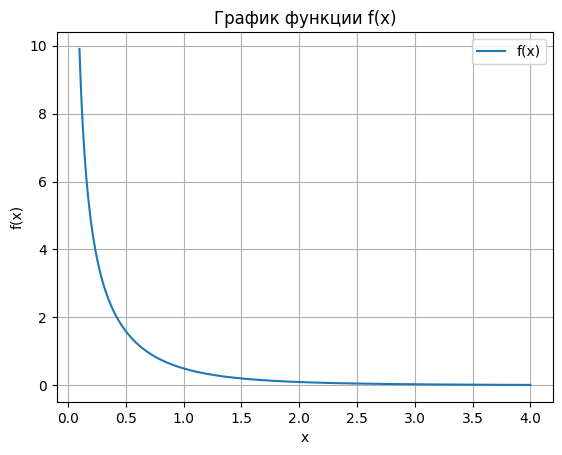

In [13]:

# Генерируем значения x на отрезке от 0 до 10
x_values = np.linspace(0.1, 4, 400)
# Вычисляем соответствующие значения y
y_values = f(x_values)

# Строим график
plt.plot(x_values, y_values, label='f(x)')
plt.xlabel('x')  # подписываем ось x
plt.ylabel('f(x)')  # подписываем ось y
plt.grid(True)  # добавляем сетку
plt.legend()  # добавляем легенду
plt.title('График функции f(x)')  # добавляем заголовок
plt.show()


In [103]:
# Находим шаг интегрирования h для вычисления интеграла по формуле трапеций
x_interval = np.linspace(a, b, 100)

M = np.max(np.abs(f_double_prime(x_interval)))
print('M =', M)

h = round(math.sqrt((e * 12) / (M * abs(b - a))), 4)
print('Первоначальное приближение h =', h)

# находим число разбиений
n = round((b - a) / h)
print('Первоначальное приближение n =', n)

# округляем до ближайшего кратного 4
is_div_4 = lambda x: x % 4 == 0
while not is_div_4(n):
   n += 1

print('Уточненное n =', n)

# пересчитываем шаг h
h = round((b - a) / n, 4)
print('Уточненный шаг h =', h)

M = 2.5
Первоначальное приближение h = 0.0632
Первоначальное приближение n = 19
Уточненное n = 20
Уточненный шаг h = 0.06


In [126]:
# задаем интервал интегрирования
interval = np.linspace(a, b, n+1)
print(f'Границы интервала: [{interval[0]}, {interval[-1]}]')

# вычисляем значения функции в точках интервала
values = np.round(f(interval), 4)
print('Значения функции в интервале')
pd.DataFrame({'X': interval, 'F(X)': values})

Границы интервала: [1.0, 2.2]
Значения функции в интервале


,X,F(X)
0,1.00,0.5000
1,1.06,0.4442
2,1.12,0.3961
3,1.18,0.3542
4,1.24,0.3178
5,1.30,0.2860
6,1.36,0.2580
7,1.42,0.2335
8,1.48,0.2118
9,1.54,0.1926


In [105]:
# считаем интеграл по формуле трапеций
trap_values = values.copy()
trap_values[0] /= 2
trap_values[-1] /= 2

print('Значения функции и интеграла')
pd.DataFrame({'X': interval, 'F(X)': values, 'Trap(X)': trap_values})


Значения функции и интеграла


,X,F(X),Trap(X)
0,1.00,0.5000,0.2500
1,1.06,0.4442,0.4442
2,1.12,0.3961,0.3961
3,1.18,0.3542,0.3542
4,1.24,0.3178,0.3178
5,1.30,0.2860,0.2860
6,1.36,0.2580,0.2580
7,1.42,0.2335,0.2335
8,1.48,0.2118,0.2118
9,1.54,0.1926,0.1926


In [106]:
S_trap = round(h * np.sum(trap_values), 4)
print('Рассчитанный интеграл по формуле трапеций с шагом h: ', S_trap)

Рассчитанный интеграл по формуле трапеций с шагом h:  0.2529


In [107]:
# считаем интеграл по формуле Симпсона
simp_values = values.copy()
simp_values[0] /= 2
simp_values[-1] /= 2
simp_values[1:-1:2] *= 2

print('Значения функции и интеграла')
pd.DataFrame({'X': interval, 'F(X)': values, 'Simpson(X)': simp_values})


Значения функции и интеграла


,X,F(X),Simpson(X)
0,1.00,0.5000,0.2500
1,1.06,0.4442,0.8884
2,1.12,0.3961,0.3961
3,1.18,0.3542,0.7084
4,1.24,0.3178,0.3178
5,1.30,0.2860,0.5720
6,1.36,0.2580,0.2580
7,1.42,0.2335,0.4670
8,1.48,0.2118,0.2118
9,1.54,0.1926,0.3852


In [108]:
S_simp = round(2 * h * np.sum(simp_values) / 3, 6)
print('Рассчитанный интеграл по формуле Симпсона с шагом h: ', S_simp)

Рассчитанный интеграл по формуле Симпсона с шагом h:  0.252668


In [109]:
# Пересчитываем интеграл с шагом 2h
n2 = n // 2
h2 = h * 2

print(f"Шаг 2h = {h2}, число разбиений n = {n2}")

# задаем интервал интегрирования
interval2 = np.linspace(a, b, n2+1)
print(f'Границы интервала: [{interval2[0]}, {interval2[-1]}]')

# вычисляем значения функции в точках интервала
values2 = np.round(f(interval2), 4)
print('Значения функции в интервале')
pd.DataFrame({'X': interval2, 'F(X)': values2})

Шаг 2h = 0.12, число разбиений n = 10
Границы интервала: [1.0, 2.2]
Значения функции в интервале


,X,F(X)
0,1.00,0.5000
1,1.12,0.3961
2,1.24,0.3178
3,1.36,0.2580
4,1.48,0.2118
5,1.60,0.1756
6,1.72,0.1469
7,1.84,0.1239
8,1.96,0.1054
9,2.08,0.0903


In [110]:
# считаем интеграл по формуле трапеций
trap_values2 = values2.copy()
trap_values2[0] /= 2
trap_values2[-1] /= 2

print('Значения функции и интеграла')
pd.DataFrame({'X': interval2, 'F(X)': values2, 'Trap(X)': trap_values2})


Значения функции и интеграла


,X,F(X),Trap(X)
0,1.00,0.5000,0.2500
1,1.12,0.3961,0.3961
2,1.24,0.3178,0.3178
3,1.36,0.2580,0.2580
4,1.48,0.2118,0.2118
5,1.60,0.1756,0.1756
6,1.72,0.1469,0.1469
7,1.84,0.1239,0.1239
8,1.96,0.1054,0.1054
9,2.08,0.0903,0.0903


In [113]:
S_trap2 = round(h2 * np.sum(trap_values2), 4)
print('Рассчитанный интеграл по формуле трапеций с шагом 2h: ', S_trap2)

Рассчитанный интеграл по формуле трапеций с шагом 2h:  0.2538


In [114]:
# считаем интеграл по формуле Симпсона
simp_values2 = values2.copy()
simp_values2[0] /= 2
simp_values2[-1] /= 2
simp_values2[1:-1:2] *= 2

print('Значения функции и интеграла')
pd.DataFrame({'X': interval2, 'F(X)': values2, 'Simpson(X)': simp_values2})


Значения функции и интеграла


,X,F(X),Simpson(X)
0,1.00,0.5000,0.2500
1,1.12,0.3961,0.7922
2,1.24,0.3178,0.3178
3,1.36,0.2580,0.5160
4,1.48,0.2118,0.2118
5,1.60,0.1756,0.3512
6,1.72,0.1469,0.1469
7,1.84,0.1239,0.2478
8,1.96,0.1054,0.1054
9,2.08,0.0903,0.1806


In [121]:
S_simp2 = round(2 * h2 * np.sum(simp_values2) / 3, 6)
print('Рассчитанный интеграл по формуле Симпсона с шагом 2h: ', S_simp2)

Рассчитанный интеграл по формуле Симпсона с шагом 2h:  0.252688


In [124]:
# Считаем погрешности

R_trap = abs(S_trap - S_trap2) / 3
R_simps = abs(S_simp - S_simp2) / 15


In [125]:
print('ИТОГИ:')
pd.DataFrame({
   'S Трап h': [S_trap], 
   'S Трап 2h': [S_trap2], 
   'Погрешность трапеций': [R_trap], 
   'S Симпсон h': [S_simp], 
   'S Симпсон 2h': [S_simp2],
   'Погрешность симпсона': [R_simps],
})


ИТОГИ:


,S Трап h,S Трап 2h,Погрешность трапеций,S Симпсон h,S Симпсон 2h,Погрешность симпсона
0,0.2529,0.2538,0.0003,0.252668,0.252688,0.000001
